## 🧑‍💻 **Multidimensional scaling (MDS)**
- Multidimensional scaling (MDS) is a visual representation of distances or dissimilarities between **sets of objects.** “Objects” can be **colors, faces, map coordinates, political persuasion**, or any kind of categorical variable.

- Objects that are **more similar (or have shorter distances) are closer together** on the graph than objects that are less similar (or have longer distances). In addition to interpreting dissimilarities as distances on a graph, MDS can also serve as a dimension reduction technique for high-dimensional data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# The distance data between cities
data = {
    'City': ['Atlanta', 'Chicago', 'Denver', 'Houston', 'Los Angeles', 'Miami', 'New York', 'San Francisco', 'Seattle', 'Washington D.C'],
    'Atlanta': [0, 587, 1212, 701, 1936, 604, 748, 2139, 2182, 543],
    'Chicago': [587, 0, 920, 940, 1745, 1188, 713, 1858, 1737, 597],
    'Denver': [1212, 920, 0, 879, 831, 1726, 1631, 949, 1021, 1494],
    'Houston': [701, 940, 879, 0, 1374, 968, 1420, 1645, 1891, 1220],
    'Los Angeles': [1936, 1745, 831, 1374, 0, 2339, 2451, 347, 959, 2300],
    'Miami': [604, 1188, 1726, 968, 2339, 0, 1092, 2594, 2734, 923],
    'New York': [748, 713, 1631, 1420, 2451, 1092, 0, 2571, 2408, 205],
    'San Francisco': [2139, 1858, 949, 1645, 347, 2594, 2571, 0, 678, 2442],
    'Seattle': [2182, 1737, 1021, 1891, 959, 2734, 2408, 678, 0, 2329],
    'Washington D.C': [543, 597, 1494, 1220, 2300, 923, 205, 2442, 2329, 0]
}

In [4]:
# Create a DataFrame
df_distance = pd.DataFrame(data)
df_distance = df_distance.set_index('City')
print("Distance Matrix:")
print(df_distance)

Distance Matrix:
                Atlanta  Chicago  Denver  Houston  Los Angeles  Miami  \
City                                                                    
Atlanta               0      587    1212      701         1936    604   
Chicago             587        0     920      940         1745   1188   
Denver             1212      920       0      879          831   1726   
Houston             701      940     879        0         1374    968   
Los Angeles        1936     1745     831     1374            0   2339   
Miami               604     1188    1726      968         2339      0   
New York            748      713    1631     1420         2451   1092   
San Francisco      2139     1858     949     1645          347   2594   
Seattle            2182     1737    1021     1891          959   2734   
Washington D.C      543      597    1494     1220         2300    923   

                New York  San Francisco  Seattle  Washington D.C  
City                                   

In [5]:
# Convert the DataFrame to a NumPy array for MDS
distance_matrix = df_distance.values

In [6]:
# Initialize and fit MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(distance_matrix)

print("\nMDS Result (2-dimensional coordinates):")
mds_df = pd.DataFrame(mds_result, index=df_distance.index, columns=['Dimension 1', 'Dimension 2'])
print(mds_df)


MDS Result (2-dimensional coordinates):
                Dimension 1  Dimension 2
City                                    
Atlanta          639.321754   356.159804
Chicago           70.455555   507.581350
Denver          -382.406946  -293.608460
Houston          494.120596  -331.887366
Los Angeles     -670.100317 -1070.789507
Miami           1237.823552   292.284074
New York         484.025041  1087.430931
San Francisco  -1013.192607 -1000.405247
Seattle        -1391.058952  -434.870862
Washington D.C   531.012326   888.105284


## Interpretation of MDS Output

This table shows the results of **Multidimensional Scaling (MDS)**, which takes a **distance matrix** and places each item (here: cities) into a **2-dimensional space** while preserving their relative distances as much as possible.

### Here
- **Dimension 1** and **Dimension 2** are the new coordinates for each city in the reduced space.
- These coordinates **do not have direct physical meaning** (like latitude/longitude); they are abstract positions derived to reflect the original distances.
- **Relative positions matter**: Cities plotted closer together in this space were closer in the original distance matrix.

### Examples
- **Miami** `(1237.82, 292.28)` is far in the positive Dimension 1 direction — meaning it is relatively distant from **Seattle** `(-1391.06, -434.87)` and **San Francisco** `(-1203.19, -1000.40)`.
- **Chicago** `(70.46, 507.58)` and **Washington D.C.** `(531.01, 888.11)` have similar Dimension 1 values, suggesting proximity compared to cities on opposite ends.
- **Los Angeles** `(-670.10, -1070.79)` is far from **New York** `(484.02, 1087.43)`, reflecting real-world geographic separation.




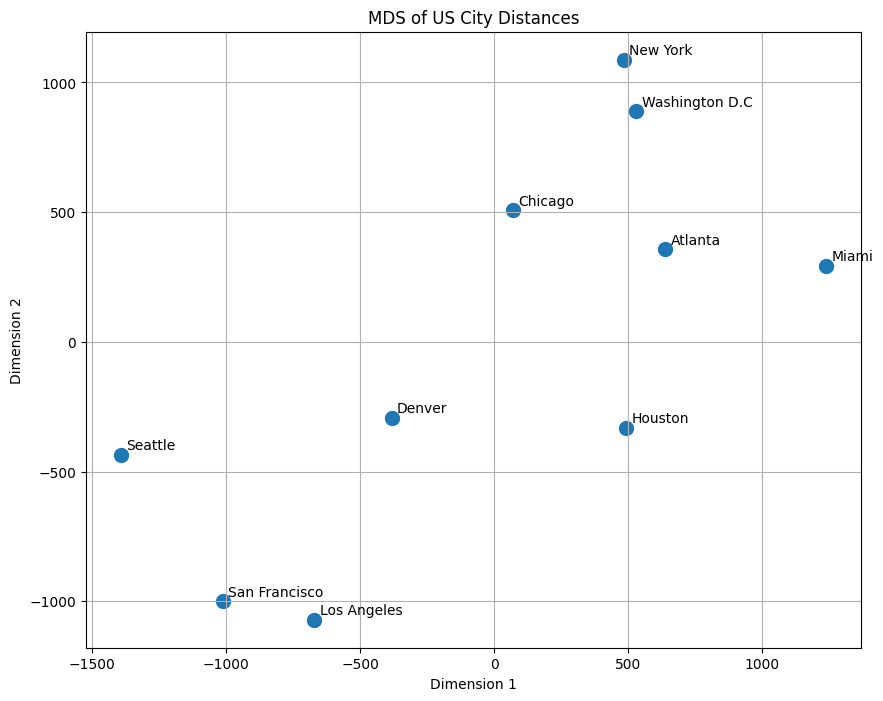

In [7]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1], s=100)

for i, city in enumerate(df_distance.index):
    plt.annotate(city, (mds_result[i, 0] + 20, mds_result[i, 1] + 20))

plt.title('MDS of US City Distances')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

## Interpretation of the MDS Scatter Plot

The plot shows the 2D output of **Multidimensional Scaling (MDS)** applied to US city distance data.  
Each point represents a city, positioned so that the **Euclidean distance between points approximates the original distances** from the input distance matrix.

### Key Observations
- **Geographic Clustering**
  - **New York** and **Washington D.C.** appear close together in the top-right region, reflecting their relatively short real-world distance.
  - **Seattle**, **San Francisco**, and **Los Angeles** cluster in the lower-left area, corresponding to West Coast locations.
  - **Atlanta** and **Miami** are relatively close on the plot, consistent with both being in the Southeast.

- **Opposite Coasts Separation**
  - **New York / Washington D.C.** (top-right) and **Los Angeles / San Francisco** (bottom-left) are far apart in the plot, matching their large geographic separation.

- **Central Cities**
  - **Chicago** and **Denver** are positioned more centrally in the plot, suggesting intermediate distances to both East and West Coast cities.

### Interpret Dimensions
- **Dimension 1 (x-axis)** loosely separates East (+ values) from West (- values).
- **Dimension 2 (y-axis)** roughly captures a North–South relationship, but it is not exact — MDS dimensions are abstract and optimized to preserve pairwise distances, not strict latitude/longitude.


